<a href="https://colab.research.google.com/github/Ropicat/Data-71200-fall-2025/blob/main/Nov_12_update_of_DATA_71200_PROJECT_ONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
# STEP ONE TO STEP SIX, BUT NOT IN THAT ORDER
#Download "Squirrel Census Data
#----------------------------------------
Of the hundreds of thousands of datasets maintained by NYC, Squirrel Census Data is one of the more whimsical. Given the various variables, many of which appear to have consistency issues, it is unclear whether the data collection was intended to yield any valuable information. Several studies have been conducted, the latest from Carnegie Mellon, but the results have been ambiguous at best.

I plan to extensively use dummy variables to determine whether the physical and behavioral data can predict the individual squirrel's behavior toward humans (running away or being indifferent or coming toward you). So this will be a Multinomial Logistic Regression, with  Again, it is not clear if there are any clear analytical outcomes, but seeking insights into Squirrel behavior is a fun exercise!



SECTION 1: "Step One" Find and Download a Dataset

SECTION 2: "Step Four" Data Cleaning

SECTION 3: "Step Six" Data Transformation

SECTION 4: "Step Two" Divide into a training set and a testing set

SECTION 5: "Step Three" Explore the training set

SECTION 6: "Step Five" Visualize the data in my training set

# Data extracted from the share link, the original file is located in my Google Drive

In [3]:
#from google.colab import drive
#import requests
import gdown

# Construct the download URL
download_url = 'https://drive.google.com/uc?export=download&id=1TmUCaPBaOSj48J_D2q9odCiT-3T3SD6S'

# Define the local filename
local_filename = '2018_Central_Park_Squirrel_Census_-_Squirrel_Data_29250910.csv'

# Download the file
response = requests.get(download_url, stream=True)
response.raise_for_status()  # Raise an exception for bad status codes

with open(local_filename, 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

print(f"Downloaded '{local_filename}' successfully.")

Downloaded '2018_Central_Park_Squirrel_Census_-_Squirrel_Data_29250910.csv' successfully.


In [4]:
import pandas as pd

# Load the downloaded CSV file into a pandas DataFrame
df = pd.read_csv('2018_Central_Park_Squirrel_Census_-_Squirrel_Data_29250910.csv')

# Display the first few rows of the DataFrame
display(df.head())

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [ ]:
# Count the number of rows and columns
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# Count the number of NaN values for each column
nan_counts = df.isnull().sum()

# Display the NaN counts
print("\nNaN counts per column:")
display(nan_counts)

Number of rows: 3023
Number of columns: 31

NaN counts per column:


,0
X,0
Y,0
Unique Squirrel ID,0
Hectare,0
Shift,0
Date,0
Hectare Squirrel Number,0
Age,121
Primary Fur Color,55
Highlight Fur Color,1086


# 2: STEP FOUR: DATA CLEANING
#  
AS DISCUSSED ABOVE, I WANTED TO FOCUS MY ANALYSIS OF THE DATA TO REFLECT QUALITATIVE ELEMENTS OF THE DATABASE. SO I DECIDED TO DELETE ALL OF THE DATA THAT LACKED SPECIFIC DESCRIPTIONS (AGE, FUR COLOR, etc.) OF THE ANIMAL, WHICH RESULTED IN THE ACCEPTABLE DATASET WITH VALID INPUT TO BE REDUCED FROM 3,000 ROWS TO 2,700 ROWS, STILL PLENTY OF DATA, I THINK, TO SEEK THE TRUTHS ON SQUIRREL BEHAVIORS!

In [ ]:
# Drop rows with NaN values in 'Age', 'Primary Fur Color', and 'Above Ground Sighter Measurement' columns
df_cleaned = df.dropna(subset=['Age', 'Primary Fur Color', 'Above Ground Sighter Measurement'])

# Display the number of rows remaining after dropping NaNs
print(f"Number of rows after dropping NaNs: {df_cleaned.shape[0]}")

# Display the first few rows of the cleaned DataFrame
display(df_cleaned.head())

Number of rows after dropping NaNs: 2784


,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
6,-73.954120,40.793181,36H-AM-1010-02,36H,AM,10102018,2,Adult,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9541201789795 40.7931811701082)
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,10082018,2,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9582694312289 40.7917367820255)
8,-73.967429,40.782972,21C-PM-1006-01,21C,PM,10062018,1,Adult,Gray,NaN,...,False,False,False,True,True,False,False,False,NaN,POINT (-73.9674285955293 40.7829723919744)
9,-73.972250,40.774288,11D-AM-1010-03,11D,AM,10102018,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9722500196844 40.7742879599026)
10,-73.969506,40.782351,20B-PM-1013-05,20B,PM,10132018,5,Adult,Gray,White,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9695063535333 40.7823507678183)


In [ ]:
# Count the number of rows and columns in the cleaned DataFrame
num_rows_cleaned, num_cols_cleaned = df_cleaned.shape
print(f"Number of rows in cleaned DataFrame: {num_rows_cleaned}")
print(f"Number of columns in cleaned DataFrame: {num_cols_cleaned}")

Number of rows in cleaned DataFrame: 2784
Number of columns in cleaned DataFrame: 31


In [ ]:
# Replace all NaN values with empty strings
df_filled = df_cleaned.fillna('')

# Display the first few rows of the DataFrame with NaNs replaced
display(df_filled.head())

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
6,-73.954120,40.793181,36H-AM-1010-02,36H,AM,10102018,2,Adult,Gray,,...,False,False,False,False,False,False,False,False,,POINT (-73.9541201789795 40.7931811701082)
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,10082018,2,Adult,Gray,,...,False,False,False,False,False,False,True,False,,POINT (-73.9582694312289 40.7917367820255)
8,-73.967429,40.782972,21C-PM-1006-01,21C,PM,10062018,1,Adult,Gray,,...,False,False,False,True,True,False,False,False,,POINT (-73.9674285955293 40.7829723919744)
9,-73.972250,40.774288,11D-AM-1010-03,11D,AM,10102018,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,True,False,,POINT (-73.9722500196844 40.7742879599026)
10,-73.969506,40.782351,20B-PM-1013-05,20B,PM,10132018,5,Adult,Gray,White,...,False,False,False,False,False,False,True,False,,POINT (-73.9695063535333 40.7823507678183)


In [ ]:
# Find unique values in 'Primary Fur Color' from df_filled
unique_primary_colors_filled = df_filled['Primary Fur Color'].unique()
print("Unique values in 'Primary Fur Color' (from df_filled):")
display(unique_primary_colors_filled)

Unique values in 'Primary Fur Color' (from df_filled):


array(['Gray', 'Cinnamon', 'Black'], dtype=object)

In [ ]:
# Find unique values in 'Highlight Fur Color' from df_filled
unique_highlight_colors_filled = df_filled['Highlight Fur Color'].unique()
print("Unique values in 'Highlight Fur Color' (from df_filled):")
display(unique_highlight_colors_filled)

Unique values in 'Highlight Fur Color' (from df_filled):


array(['', 'Cinnamon', 'White', 'Gray', 'Cinnamon, White', 'Gray, White',
       'Black, Cinnamon, White', 'Black', 'Black, White',
       'Black, Cinnamon', 'Gray, Black'], dtype=object)

In [ ]:
# Drop the 'Lat/Long' column
df_transformed = df_filled.drop('Lat/Long', axis=1)

# Display the first few rows of the DataFrame after dropping the column
display(df_transformed.head())

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Other Activities,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions
6,-73.954120,40.793181,36H-AM-1010-02,36H,AM,10102018,2,Adult,Gray,,...,,False,False,False,False,False,False,False,False,
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,10082018,2,Adult,Gray,,...,,False,False,False,False,False,False,True,False,
8,-73.967429,40.782972,21C-PM-1006-01,21C,PM,10062018,1,Adult,Gray,,...,,False,False,False,True,True,False,False,False,
9,-73.972250,40.774288,11D-AM-1010-03,11D,AM,10102018,3,Adult,Gray,Cinnamon,...,grooming,False,False,False,False,False,False,True,False,
10,-73.969506,40.782351,20B-PM-1013-05,20B,PM,10132018,5,Adult,Gray,White,...,,False,False,False,False,False,False,True,False,


In [ ]:
# Filter the DataFrame to keep rows where at least one of the behavior columns is True
df_filtered_behavior = df_transformed[(df_transformed['Approaches'] == True) |
                                     (df_transformed['Indifferent'] == True) |
                                     (df_transformed['Runs from'] == True)]

# Display the number of rows remaining after filtering
print(f"Number of rows after filtering for behavior: {df_filtered_behavior.shape[0]}")

# Display the first few rows of the filtered DataFrame
display(df_filtered_behavior.head())

Number of rows after filtering for behavior: 2103


,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Other Activities,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,10082018,2,Adult,Gray,,...,,False,False,False,False,False,False,True,False,
9,-73.972250,40.774288,11D-AM-1010-03,11D,AM,10102018,3,Adult,Gray,Cinnamon,...,grooming,False,False,False,False,False,False,True,False,
10,-73.969506,40.782351,20B-PM-1013-05,20B,PM,10132018,5,Adult,Gray,White,...,,False,False,False,False,False,False,True,False,
11,-73.964003,40.782031,22F-PM-1014-06,22F,PM,10142018,6,Adult,Gray,,...,,False,False,False,False,True,False,True,False,
12,-73.953217,40.791967,36I-PM-1007-01,36I,PM,10072018,1,Adult,Gray,Cinnamon,...,,False,False,False,False,False,False,True,False,


In [ ]:
# Count the number of rows in the filtered DataFrame
num_rows_filtered = df_filtered_behavior.shape[0]
print(f"Number of rows in the filtered DataFrame: {num_rows_filtered}")

Number of rows in the filtered DataFrame: 2103


In [ ]:
# Convert 'Date' column to datetime objects, specifying the format ALL OF THE DATA ARE OBTAINED DURING THE MONTH OF OCTOBER, 2018.
df_transformed['Date'] = pd.to_datetime(df_transformed['Date'], format='%m%d%Y')

# Extract month name and day
df_transformed['Date'] = df_transformed['Date'].dt.strftime('%B %d')

# Display the first few rows with the transformed 'Date' column
display(df_transformed.head())

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Other Activities,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions
6,-73.954120,40.793181,36H-AM-1010-02,36H,AM,October 10,2,Adult,Gray,,...,,False,False,False,False,False,False,False,False,
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,October 08,2,Adult,Gray,,...,,False,False,False,False,False,False,True,False,
8,-73.967429,40.782972,21C-PM-1006-01,21C,PM,October 06,1,Adult,Gray,,...,,False,False,False,True,True,False,False,False,
9,-73.972250,40.774288,11D-AM-1010-03,11D,AM,October 10,3,Adult,Gray,Cinnamon,...,grooming,False,False,False,False,False,False,True,False,
10,-73.969506,40.782351,20B-PM-1013-05,20B,PM,October 13,5,Adult,Gray,White,...,,False,False,False,False,False,False,True,False,


# SECTION 3: "Step Six" Data Transformation
#
Here, I created several dummy variables re Age (juvenile or adult), Shift (Morning or Afternoon), Primary Fur Color (five different colors),for and Highlit Color (about a dozen, plus No Highlight) I also generated the Dependent Variable (0,1,2) that describes if the Squirrels are running away from you, remain unmoved (indifferent) or coming toward you. Note that coming toward you does not necessarily mean the critter is friendly!

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Initialize OneHotEncoder
# handle_unknown='ignore' will skip categories not seen during fit
# sparse_output=False ensures a dense array output
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Reshape the 'Primary Fur Color' column for the encoder
primary_fur_color_reshaped = df_filled['Primary Fur Color'].values.reshape(-1, 1)

# Fit and transform the data
primary_fur_color_encoded = encoder.fit_transform(primary_fur_color_reshaped)

# Create a DataFrame from the encoded data
# Use get_feature_names_out() to get the column names
primary_fur_color_dummies_ohe = pd.DataFrame(primary_fur_color_encoded, columns=encoder.get_feature_names_out(['Primary_Fur_Color']))

# Convert float values to integers (1.0=1, 0.0=0)
primary_fur_color_dummies_ohe = primary_fur_color_dummies_ohe.astype(int)

# Ensure the index matches df_transformed before concatenating
primary_fur_color_dummies_ohe.index = df_transformed.index


# Concatenate the new dummy columns to the DataFrame
df_transformed = pd.concat([df_transformed, primary_fur_color_dummies_ohe], axis=1)

# Drop the original 'Primary Fur Color' column from df_transformed if it still exists
if 'Primary Fur Color' in df_transformed.columns:
    df_transformed = df_transformed.drop('Primary Fur Color', axis=1)

# Display the first few rows with the new dummy variables
display(df_transformed.head())

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Highlight Fur Color,Combination of Primary and Highlight Color,...,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Primary_Fur_Color_Black,Primary_Fur_Color_Cinnamon,Primary_Fur_Color_Gray
6,-73.954120,40.793181,36H-AM-1010-02,36H,AM,October 10,2,Adult,,Gray+,...,False,False,False,False,False,False,,0,0,1
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,October 08,2,Adult,,Gray+,...,False,False,False,False,True,False,,0,0,1
8,-73.967429,40.782972,21C-PM-1006-01,21C,PM,October 06,1,Adult,,Gray+,...,False,True,True,False,False,False,,0,0,1
9,-73.972250,40.774288,11D-AM-1010-03,11D,AM,October 10,3,Adult,Cinnamon,Gray+Cinnamon,...,False,False,False,False,True,False,,0,0,1
10,-73.969506,40.782351,20B-PM-1013-05,20B,PM,October 13,5,Adult,White,Gray+White,...,False,False,False,False,True,False,,0,0,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Initialize OneHotEncoder
# handle_unknown='ignore' will skip categories not seen during fit
# sparse_output=False ensures a dense array output
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Reshape the 'Highlight Fur Color' column for the encoder
highlight_fur_color_reshaped = df_filled['Highlight Fur Color'].values.reshape(-1, 1)

# Fit and transform the data
highlight_fur_color_encoded = encoder.fit_transform(highlight_fur_color_reshaped)

# Create a DataFrame from the encoded data
# Use get_feature_names_out() to get the column names
highlight_fur_color_dummies_ohe = pd.DataFrame(highlight_fur_color_encoded, columns=encoder.get_feature_names_out(['Highlight_Fur_Color']))

# Convert float values to integers (1.0=1, 0.0=0)
highlight_fur_color_dummies_ohe = highlight_fur_color_dummies_ohe.astype(int)

# Ensure the index matches df_transformed before concatenating
highlight_fur_color_dummies_ohe.index = df_transformed.index

# Add the 'Highlight_Fur_Color_None' column for blank values
highlight_fur_color_dummies_ohe['Highlight_Fur_Color_None'] = (df_filled['Highlight Fur Color'] == '').astype(int)


# Concatenate the new dummy columns to the DataFrame
df_transformed = pd.concat([df_transformed, highlight_fur_color_dummies_ohe], axis=1)

# Drop the original 'Highlight Fur Color' column from df_transformed if it still exists
if 'Highlight Fur Color' in df_transformed.columns:
    df_transformed = df_transformed.drop('Highlight Fur Color', axis=1)

# Display the first few rows with the new dummy variables
display(df_transformed.head())

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Combination of Primary and Highlight Color,Color notes,...,"Highlight_Fur_Color_Black, Cinnamon","Highlight_Fur_Color_Black, Cinnamon, White","Highlight_Fur_Color_Black, White",Highlight_Fur_Color_Cinnamon,"Highlight_Fur_Color_Cinnamon, White",Highlight_Fur_Color_Gray,"Highlight_Fur_Color_Gray, Black","Highlight_Fur_Color_Gray, White",Highlight_Fur_Color_White,Highlight_Fur_Color_None
6,-73.954120,40.793181,36H-AM-1010-02,36H,AM,October 10,2,Adult,Gray+,just outside hectare,...,0,0,0,0,0,0,0,0,0,1
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,October 08,2,Adult,Gray+,,...,0,0,0,0,0,0,0,0,0,1
8,-73.967429,40.782972,21C-PM-1006-01,21C,PM,October 06,1,Adult,Gray+,,...,0,0,0,0,0,0,0,0,0,1
9,-73.972250,40.774288,11D-AM-1010-03,11D,AM,October 10,3,Adult,Gray+Cinnamon,,...,0,0,0,1,0,0,0,0,0,0
10,-73.969506,40.782351,20B-PM-1013-05,20B,PM,October 13,5,Adult,Gray+White,,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Identify columns that start with 'Other Activities'
other_activities_columns = [col for col in df_transformed.columns if col.startswith('Other Activities')]

# Drop these columns from the DataFrame
df_transformed = df_transformed.drop(columns=other_activities_columns, errors='ignore')

# Display the first few rows of the DataFrame after dropping the columns
display(df_transformed.head())

# Display the column names to confirm removal
display(df_transformed.columns)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Combination of Primary and Highlight Color,Color notes,...,"Highlight_Fur_Color_Black, Cinnamon","Highlight_Fur_Color_Black, Cinnamon, White","Highlight_Fur_Color_Black, White",Highlight_Fur_Color_Cinnamon,"Highlight_Fur_Color_Cinnamon, White",Highlight_Fur_Color_Gray,"Highlight_Fur_Color_Gray, Black","Highlight_Fur_Color_Gray, White",Highlight_Fur_Color_White,Highlight_Fur_Color_None
6,-73.954120,40.793181,36H-AM-1010-02,36H,AM,October 10,2,Adult,Gray+,just outside hectare,...,0,0,0,0,0,0,0,0,0,1
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,October 08,2,Adult,Gray+,,...,0,0,0,0,0,0,0,0,0,1
8,-73.967429,40.782972,21C-PM-1006-01,21C,PM,October 06,1,Adult,Gray+,,...,0,0,0,0,0,0,0,0,0,1
9,-73.972250,40.774288,11D-AM-1010-03,11D,AM,October 10,3,Adult,Gray+Cinnamon,,...,0,0,0,1,0,0,0,0,0,0
10,-73.969506,40.782351,20B-PM-1013-05,20B,PM,October 13,5,Adult,Gray+White,,...,0,0,0,0,0,0,0,0,1,0


Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age',
       'Combination of Primary and Highlight Color', 'Color notes', 'Location',
       'Above Ground Sighter Measurement', 'Specific Location', 'Running',
       'Chasing', 'Climbing', 'Eating', 'Foraging', 'Kuks', 'Quaas', 'Moans',
       'Tail flags', 'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Primary_Fur_Color_Black',
       'Primary_Fur_Color_Cinnamon', 'Primary_Fur_Color_Gray',
       'Highlight_Fur_Color_', 'Highlight_Fur_Color_Black',
       'Highlight_Fur_Color_Black, Cinnamon',
       'Highlight_Fur_Color_Black, Cinnamon, White',
       'Highlight_Fur_Color_Black, White', 'Highlight_Fur_Color_Cinnamon',
       'Highlight_Fur_Color_Cinnamon, White', 'Highlight_Fur_Color_Gray',
       'Highlight_Fur_Color_Gray, Black', 'Highlight_Fur_Color_Gray, White',
       'Highlight_Fur_Color_White', 'Highlight_Fur_Color_None'],
      dtyp

In [ ]:
# Create the dependent variable 'Behaviors_toward_people'
def get_behavior(row):
    if row['Approaches']:
        return 0
    elif row['Indifferent']:
        return 1
    elif row['Runs from']:
        return 2
    else:
        return np.nan # Handle cases where none are True

df_transformed['Behaviors_toward_people'] = df_transformed.apply(get_behavior, axis=1)

# Display the first few rows with the new dependent variable column
display(df_transformed[['Approaches', 'Indifferent', 'Runs from', 'Behaviors_toward_people']].head())

,Approaches,Indifferent,Runs from,Behaviors_toward_people
6,False,False,False,NaN
7,False,True,False,1.0
8,False,False,False,NaN
9,False,True,False,1.0
10,False,True,False,1.0


In [ ]:
# Display the column names of the DataFrame
display(df_transformed.columns)

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age',
       'Combination of Primary and Highlight Color', 'Color notes', 'Location',
       'Above Ground Sighter Measurement', 'Specific Location', 'Running',
       'Chasing', 'Climbing', 'Eating', 'Foraging', 'Kuks', 'Quaas', 'Moans',
       'Tail flags', 'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Primary_Fur_Color_Black',
       'Primary_Fur_Color_Cinnamon', 'Primary_Fur_Color_Gray',
       'Highlight_Fur_Color_', 'Highlight_Fur_Color_Black',
       'Highlight_Fur_Color_Black, Cinnamon',
       'Highlight_Fur_Color_Black, Cinnamon, White',
       'Highlight_Fur_Color_Black, White', 'Highlight_Fur_Color_Cinnamon',
       'Highlight_Fur_Color_Cinnamon, White', 'Highlight_Fur_Color_Gray',
       'Highlight_Fur_Color_Gray, Black', 'Highlight_Fur_Color_Gray, White',
       'Highlight_Fur_Color_White', 'Highlight_Fur_Color_None',
       'Beh

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# List of behavioral columns to encode
behavioral_columns = ['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging',
                     'Kuks', 'Quaas', 'Moans', 'Tail flags',
                      'Tail twitches']

# Initialize OneHotEncoder
# handle_unknown='ignore' will skip categories not seen during fit
# sparse_output=False ensures a dense array output
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Apply OneHotEncoder to the behavioral columns from df_filled
behavioral_encoded = encoder.fit_transform(df_filled[behavioral_columns])

# Create a DataFrame from the encoded data
behavioral_dummies_ohe = pd.DataFrame(behavioral_encoded, columns=encoder.get_feature_names_out(behavioral_columns))

# Convert float values to integers (1.0=1, 0.0=0)
behavioral_dummies_ohe = behavioral_dummies_ohe.astype(int)

# Ensure the index matches df_transformed before concatenating
behavioral_dummies_ohe.index = df_transformed.index

# Concatenate the new dummy columns to the DataFrame
df_transformed = pd.concat([df_transformed, behavioral_dummies_ohe], axis=1)

# Drop the original behavioral columns from df_transformed if they still exist
df_transformed = df_transformed.drop(behavioral_columns, axis=1, errors='ignore')

# Drop the specified '_False' dummy variable columns
false_columns_to_drop = ['Running_False','Chasing_False','Climbing_False','Eating_False','Foraging_False','Kuks_False', 'Quaas_False', 'Moans_False', 'Tail flags_False', 'Tail twitches_False']
df_transformed = df_transformed.drop(false_columns_to_drop, axis=1, errors='ignore')


# Display the first few rows with the new dummy variables
display(df_transformed.head())

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Combination of Primary and Highlight Color,Color notes,...,Running_True,Chasing_True,Climbing_True,Eating_True,Foraging_True,Kuks_True,Quaas_True,Moans_True,Tail flags_True,Tail twitches_True
6,-73.954120,40.793181,36H-AM-1010-02,36H,AM,October 10,2,Adult,Gray+,just outside hectare,...,0,0,0,0,1,0,0,0,0,0
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,October 08,2,Adult,Gray+,,...,0,0,0,0,1,0,0,0,0,0
8,-73.967429,40.782972,21C-PM-1006-01,21C,PM,October 06,1,Adult,Gray+,,...,0,0,0,0,0,0,0,0,1,1
9,-73.972250,40.774288,11D-AM-1010-03,11D,AM,October 10,3,Adult,Gray+Cinnamon,,...,0,0,1,0,0,0,0,0,0,0
10,-73.969506,40.782351,20B-PM-1013-05,20B,PM,October 13,5,Adult,Gray+White,,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Display the column names of the DataFrame
display(df_transformed.columns)

Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age',
       'Combination of Primary and Highlight Color', 'Color notes', 'Location',
       'Above Ground Sighter Measurement', 'Specific Location', 'Approaches',
       'Indifferent', 'Runs from', 'Other Interactions',
       'Primary_Fur_Color_Black', 'Primary_Fur_Color_Cinnamon',
       'Primary_Fur_Color_Gray', 'Highlight_Fur_Color_',
       'Highlight_Fur_Color_Black', 'Highlight_Fur_Color_Black, Cinnamon',
       'Highlight_Fur_Color_Black, Cinnamon, White',
       'Highlight_Fur_Color_Black, White', 'Highlight_Fur_Color_Cinnamon',
       'Highlight_Fur_Color_Cinnamon, White', 'Highlight_Fur_Color_Gray',
       'Highlight_Fur_Color_Gray, Black', 'Highlight_Fur_Color_Gray, White',
       'Highlight_Fur_Color_White', 'Highlight_Fur_Color_None',
       'Behaviors_toward_people', 'Running_True', 'Chasing_True',
       'Climbing_True', 'Eating_True', 'Foraging_True', 'Kuks_True',
   

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive (if not already mounted)
# drive.mount('/content/drive') # Assuming drive is already mounted from previous steps

# Define the path in your Google Drive
drive_path = '/content/drive/MyDrive/Updated_Squirrel.csv'

# Save the DataFrame to a CSV file in Google Drive
df_transformed.to_csv(drive_path, index=False)

print(f"DataFrame saved to '{drive_path}' successfully.")

DataFrame saved to '/content/drive/MyDrive/Updated_Squirrel.csv' successfully.


In [ ]:
# Get a list of duplicate column names
duplicate_columns = df_transformed.columns[df_transformed.columns.duplicated()]

# Drop the duplicate columns, keeping the first occurrence
df_transformed_unique_cols = df_transformed.loc[:,~df_transformed.columns.duplicated()]

print("Original number of columns:", df_transformed.shape[1])
print("Number of columns after removing duplicates:", df_transformed_unique_cols.shape[1])

# Update df_transformed to the DataFrame with unique columns
df_transformed = df_transformed_unique_cols

# Display the first few rows of the DataFrame with unique columns
display(df_transformed.head())

# Display the column names to confirm removal of duplicates
display(df_transformed.columns)

Original number of columns: 43
Number of columns after removing duplicates: 43


,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Combination of Primary and Highlight Color,Color notes,...,Running_True,Chasing_True,Climbing_True,Eating_True,Foraging_True,Kuks_True,Quaas_True,Moans_True,Tail flags_True,Tail twitches_True
6,-73.954120,40.793181,36H-AM-1010-02,36H,AM,October 10,2,Adult,Gray+,just outside hectare,...,0,0,0,0,1,0,0,0,0,0
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,October 08,2,Adult,Gray+,,...,0,0,0,0,1,0,0,0,0,0
8,-73.967429,40.782972,21C-PM-1006-01,21C,PM,October 06,1,Adult,Gray+,,...,0,0,0,0,0,0,0,0,1,1
9,-73.972250,40.774288,11D-AM-1010-03,11D,AM,October 10,3,Adult,Gray+Cinnamon,,...,0,0,1,0,0,0,0,0,0,0
10,-73.969506,40.782351,20B-PM-1013-05,20B,PM,October 13,5,Adult,Gray+White,,...,0,0,0,0,1,0,0,0,0,0


Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age',
       'Combination of Primary and Highlight Color', 'Color notes', 'Location',
       'Above Ground Sighter Measurement', 'Specific Location', 'Approaches',
       'Indifferent', 'Runs from', 'Other Interactions',
       'Primary_Fur_Color_Black', 'Primary_Fur_Color_Cinnamon',
       'Primary_Fur_Color_Gray', 'Highlight_Fur_Color_',
       'Highlight_Fur_Color_Black', 'Highlight_Fur_Color_Black, Cinnamon',
       'Highlight_Fur_Color_Black, Cinnamon, White',
       'Highlight_Fur_Color_Black, White', 'Highlight_Fur_Color_Cinnamon',
       'Highlight_Fur_Color_Cinnamon, White', 'Highlight_Fur_Color_Gray',
       'Highlight_Fur_Color_Gray, Black', 'Highlight_Fur_Color_Gray, White',
       'Highlight_Fur_Color_White', 'Highlight_Fur_Color_None',
       'Behaviors_toward_people', 'Running_True', 'Chasing_True',
       'Climbing_True', 'Eating_True', 'Foraging_True', 'Kuks_True',
   

In [ ]:
# Drop rows with NaN values in 'Behaviors_toward_people'
df_cleaned_behavior = df_transformed.dropna(subset=['Behaviors_toward_people'])

# Display the number of rows remaining after dropping NaNs
print(f"Number of rows after dropping NaNs in 'Behaviors_toward_people': {df_cleaned_behavior.shape[0]}")

# Display the first few rows of the cleaned DataFrame
display(df_cleaned_behavior.head())

Number of rows after dropping NaNs in 'Behaviors_toward_people': 2103


,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Combination of Primary and Highlight Color,Color notes,...,Eating_True,Foraging_True,Kuks_True,Quaas_True,Moans_True,Tail flags_True,Tail twitches_True,Behaviors_toward_people,Adult,Morning
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,October 08,2,Adult,Gray+,,...,0,1,0,0,0,0,0,1.0,1,1
9,-73.972250,40.774288,11D-AM-1010-03,11D,AM,October 10,3,Adult,Gray+Cinnamon,,...,0,0,0,0,0,0,0,1.0,1,1
10,-73.969506,40.782351,20B-PM-1013-05,20B,PM,October 13,5,Adult,Gray+White,,...,0,1,0,0,0,0,0,1.0,1,
11,-73.964003,40.782031,22F-PM-1014-06,22F,PM,October 14,6,Adult,Gray+,,...,0,0,0,0,0,0,1,1.0,1,
12,-73.953217,40.791967,36I-PM-1007-01,36I,PM,October 07,1,Adult,Gray+Cinnamon,,...,0,1,0,0,0,0,0,1.0,1,


In [ ]:
# Create 'Morning' dummy variable
df_transformed['Morning'] = df_transformed['Shift'].apply(lambda x: 1 if x == 'AM' else '')

# Display the first few rows with the new 'Morning' column
display(df_transformed.head())

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Combination of Primary and Highlight Color,Color notes,...,Chasing_True,Climbing_True,Eating_True,Foraging_True,Kuks_True,Quaas_True,Moans_True,Tail flags_True,Tail twitches_True,Morning
6,-73.954120,40.793181,36H-AM-1010-02,36H,AM,October 10,2,Adult,Gray+,just outside hectare,...,0,0,0,1,0,0,0,0,0,1
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,October 08,2,Adult,Gray+,,...,0,0,0,1,0,0,0,0,0,1
8,-73.967429,40.782972,21C-PM-1006-01,21C,PM,October 06,1,Adult,Gray+,,...,0,0,0,0,0,0,0,1,1,
9,-73.972250,40.774288,11D-AM-1010-03,11D,AM,October 10,3,Adult,Gray+Cinnamon,,...,0,1,0,0,0,0,0,0,0,1
10,-73.969506,40.782351,20B-PM-1013-05,20B,PM,October 13,5,Adult,Gray+White,,...,0,0,0,1,0,0,0,0,0,


# SECTION 4: STEP TWO Divide into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# --- Code to recreate df_cleaned_behavior ---
# Assuming df is available from previous execution. If not, you might need to add that code too.

# Drop rows with NaN values in 'Age', 'Primary Fur Color', and 'Above Ground Sighter Measurement' columns
df_cleaned = df.dropna(subset=['Age', 'Primary Fur Color', 'Above Ground Sighter Measurement'])

# Replace all NaN values with empty strings in df_cleaned to create df_filled
df_filled = df_cleaned.fillna('')

# Drop the 'Lat/Long' column
df_transformed = df_filled.drop('Lat/Long', axis=1)

# Convert 'Date' column to datetime objects, specifying the format
# Assuming the format is month, day, year without separators like '10102018'
df_transformed['Date'] = pd.to_datetime(df_transformed['Date'], format='%m%d%Y')

# Extract month name and day
df_transformed['Date'] = df_transformed['Date'].dt.strftime('%B %d')


# Create the dependent variable 'Behaviors_toward_people'
def get_behavior(row):
    if row['Approaches']:
        return 0
    elif row['Indifferent']:
        return 1
    elif row['Runs from']:
        return 2
    else:
        return np.nan # Handle cases where none are True

df_transformed['Behaviors_toward_people'] = df_transformed.apply(get_behavior, axis=1)

# Drop rows with NaN values in 'Behaviors_toward_people'
df_cleaned_behavior = df_transformed.dropna(subset=['Behaviors_toward_people'])
# --- End of code to recreate df_cleaned_behavior ---


# Define features (X) and target variable (y)
# Drop the original behavior columns and Unique Squirrel ID, Color notes, Location, Specific Location, Other Interactions
X = df_cleaned_behavior.drop(['Behaviors_toward_people', 'Approaches', 'Indifferent', 'Runs from',
                              'Unique Squirrel ID', 'Color notes', 'Location', 'Specific Location', 'Other Interactions'], axis=1)
y = df_cleaned_behavior['Behaviors_toward_people']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Using a test size of 30% and a random state for reproducibility

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1472, 22)
Shape of X_test: (631, 22)
Shape of y_train: (1472,)
Shape of y_test: (631,)


In [ ]:
# Display the info of the training features
print("Info of X_train:")
display(X_train.info())

# Display the descriptive statistics of the training features
print("\nDescriptive statistics of X_train:")
display(X_train.describe())

# Display the info of the training target variable
print("\nInfo of y_train:")
display(y_train.info())

# Display the descriptive statistics of the training target variable
print("\nDescriptive statistics of y_train:")
display(y_train.describe())

Info of X_train:
<class 'pandas.core.frame.DataFrame'>
Index: 1472 entries, 820 to 1242
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           1472 non-null   float64
 1   Y                                           1472 non-null   float64
 2   Hectare                                     1472 non-null   object 
 3   Shift                                       1472 non-null   object 
 4   Date                                        1472 non-null   object 
 5   Hectare Squirrel Number                     1472 non-null   int64  
 6   Age                                         1472 non-null   object 
 7   Primary Fur Color                           1472 non-null   object 
 8   Highlight Fur Color                         1472 non-null   object 
 9   Combination of Primary and Highlight Color  1472 non-null   object 
 10

None


Descriptive statistics of X_train:


,X,Y,Hectare Squirrel Number
count,1472.000000,1472.000000,1472.000000
mean,-73.967195,40.780770,4.086277
std,0.007730,0.010393,3.213039
min,-73.981108,40.764911,1.000000
25%,-73.973013,40.771546,2.000000
50%,-73.968880,40.777875,3.000000
75%,-73.959942,40.791269,6.000000
max,-73.949842,40.799771,23.000000



Info of y_train:
<class 'pandas.core.series.Series'>
Index: 1472 entries, 820 to 1242
Series name: Behaviors_toward_people
Non-Null Count  Dtype  
--------------  -----  
1472 non-null   float64
dtypes: float64(1)
memory usage: 23.0 KB


None


Descriptive statistics of y_train:


,Behaviors_toward_people
count,1472.000000
mean,1.192935
std,0.570762
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


# SECTION 5: STEP THREE Exploration of my training set

Basic statistics of the training set

In [ ]:
# Display the info of the training features
print("Info of X_train:")
X_train.info()

# Display the descriptive statistics of the training features
print("\nDescriptive statistics of X_train:")
display(X_train.describe())

# Display the info of the training target variable
print("\nInfo of y_train:")
y_train.info()

# Display the descriptive statistics of the training target variable
print("\nDescriptive statistics of y_train:")
display(y_train.describe())

Info of X_train:
<class 'pandas.core.frame.DataFrame'>
Index: 1472 entries, 820 to 1242
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           1472 non-null   float64
 1   Y                                           1472 non-null   float64
 2   Hectare                                     1472 non-null   object 
 3   Shift                                       1472 non-null   object 
 4   Date                                        1472 non-null   object 
 5   Hectare Squirrel Number                     1472 non-null   int64  
 6   Age                                         1472 non-null   object 
 7   Primary Fur Color                           1472 non-null   object 
 8   Highlight Fur Color                         1472 non-null   object 
 9   Combination of Primary and Highlight Color  1472 non-null   object 
 10

,X,Y,Hectare Squirrel Number
count,1472.000000,1472.000000,1472.000000
mean,-73.967195,40.780770,4.086277
std,0.007730,0.010393,3.213039
min,-73.981108,40.764911,1.000000
25%,-73.973013,40.771546,2.000000
50%,-73.968880,40.777875,3.000000
75%,-73.959942,40.791269,6.000000
max,-73.949842,40.799771,23.000000



Info of y_train:
<class 'pandas.core.series.Series'>
Index: 1472 entries, 820 to 1242
Series name: Behaviors_toward_people
Non-Null Count  Dtype  
--------------  -----  
1472 non-null   float64
dtypes: float64(1)
memory usage: 23.0 KB

Descriptive statistics of y_train:


,Behaviors_toward_people
count,1472.000000
mean,1.192935
std,0.570762
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


# SECTION 6: STEP FIVE VISUALIZATION OF THE TRAINING DATASET

Let's visuallyexplore the basic statistics and information about the training set (`X_train`, 'y_train) data

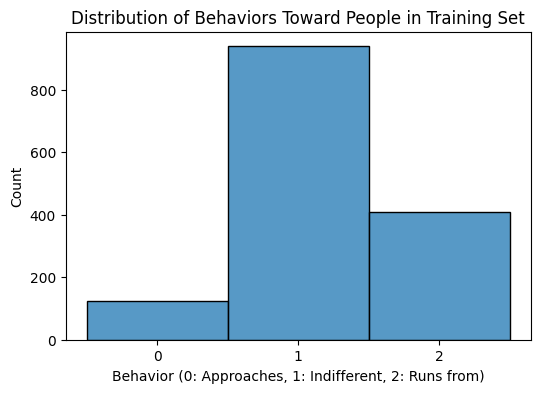

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for the dependent variable (y_train)
plt.figure(figsize=(6, 4))
sns.histplot(y_train, bins=[-0.5, 0.5, 1.5, 2.5], kde=False, discrete=True)
plt.title('Distribution of Behaviors Toward People in Training Set')
plt.xlabel('Behavior (0: Approaches, 1: Indifferent, 2: Runs from)')
plt.ylabel('Count')
plt.xticks([0, 1, 2])
plt.show()

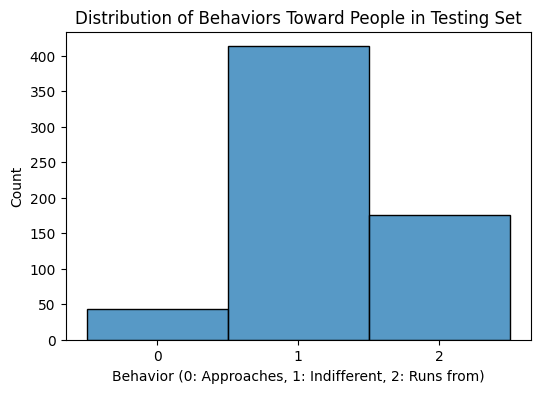

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for the dependent variable (y_test)
plt.figure(figsize=(6, 4))
sns.histplot(y_test, bins=[-0.5, 0.5, 1.5, 2.5], kde=False, discrete=True)
plt.title('Distribution of Behaviors Toward People in Testing Set')
plt.xlabel('Behavior (0: Approaches, 1: Indifferent, 2: Runs from)')
plt.ylabel('Count')
plt.xticks([0, 1, 2])
plt.show()

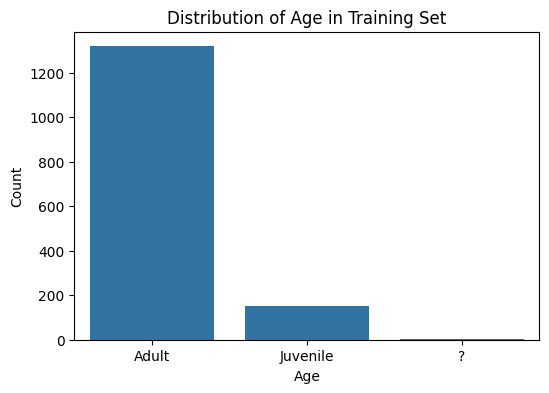

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Age in the training set
plt.figure(figsize=(6, 4))
sns.countplot(data=X_train, x='Age')
plt.title('Distribution of Age in Training Set')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

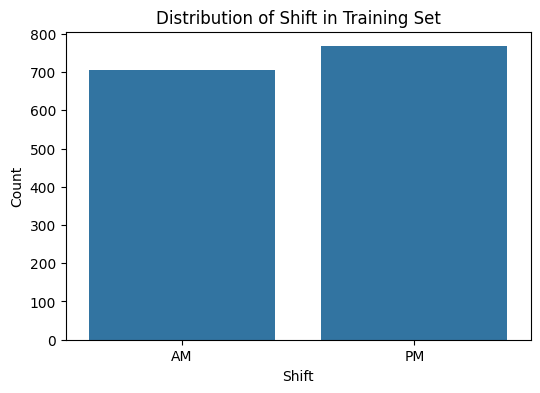

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Shift in the training set
plt.figure(figsize=(6, 4))
sns.countplot(data=X_train, x='Shift')
plt.title('Distribution of Shift in Training Set')
plt.xlabel('Shift')
plt.ylabel('Count')
plt.show()

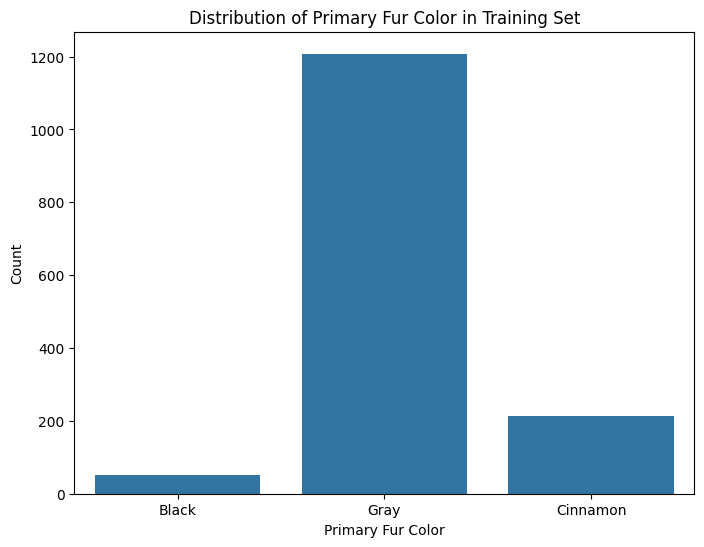

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Primary Fur Color in the training set
plt.figure(figsize=(8, 6))
sns.countplot(data=X_train, x='Primary Fur Color')
plt.title('Distribution of Primary Fur Color in Training Set')
plt.xlabel('Primary Fur Color')
plt.ylabel('Count')
plt.show()

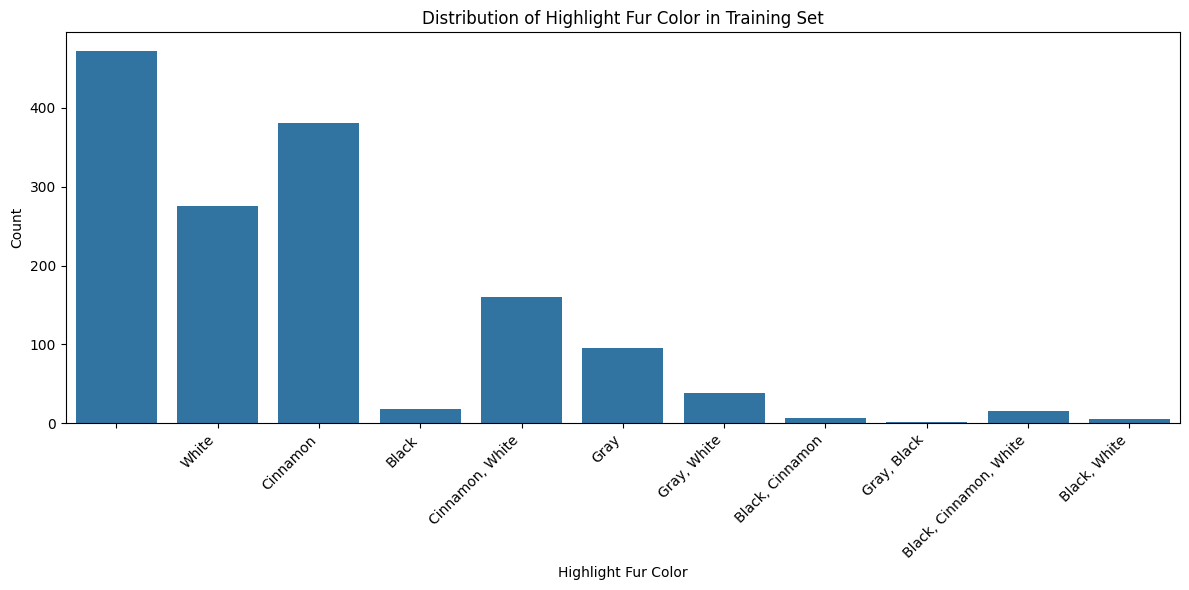

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Highlight Fur Color in the training set
plt.figure(figsize=(12, 6))
sns.countplot(data=X_train, x='Highlight Fur Color')
plt.title('Distribution of Highlight Fur Color in Training Set')
plt.xlabel('Highlight Fur Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

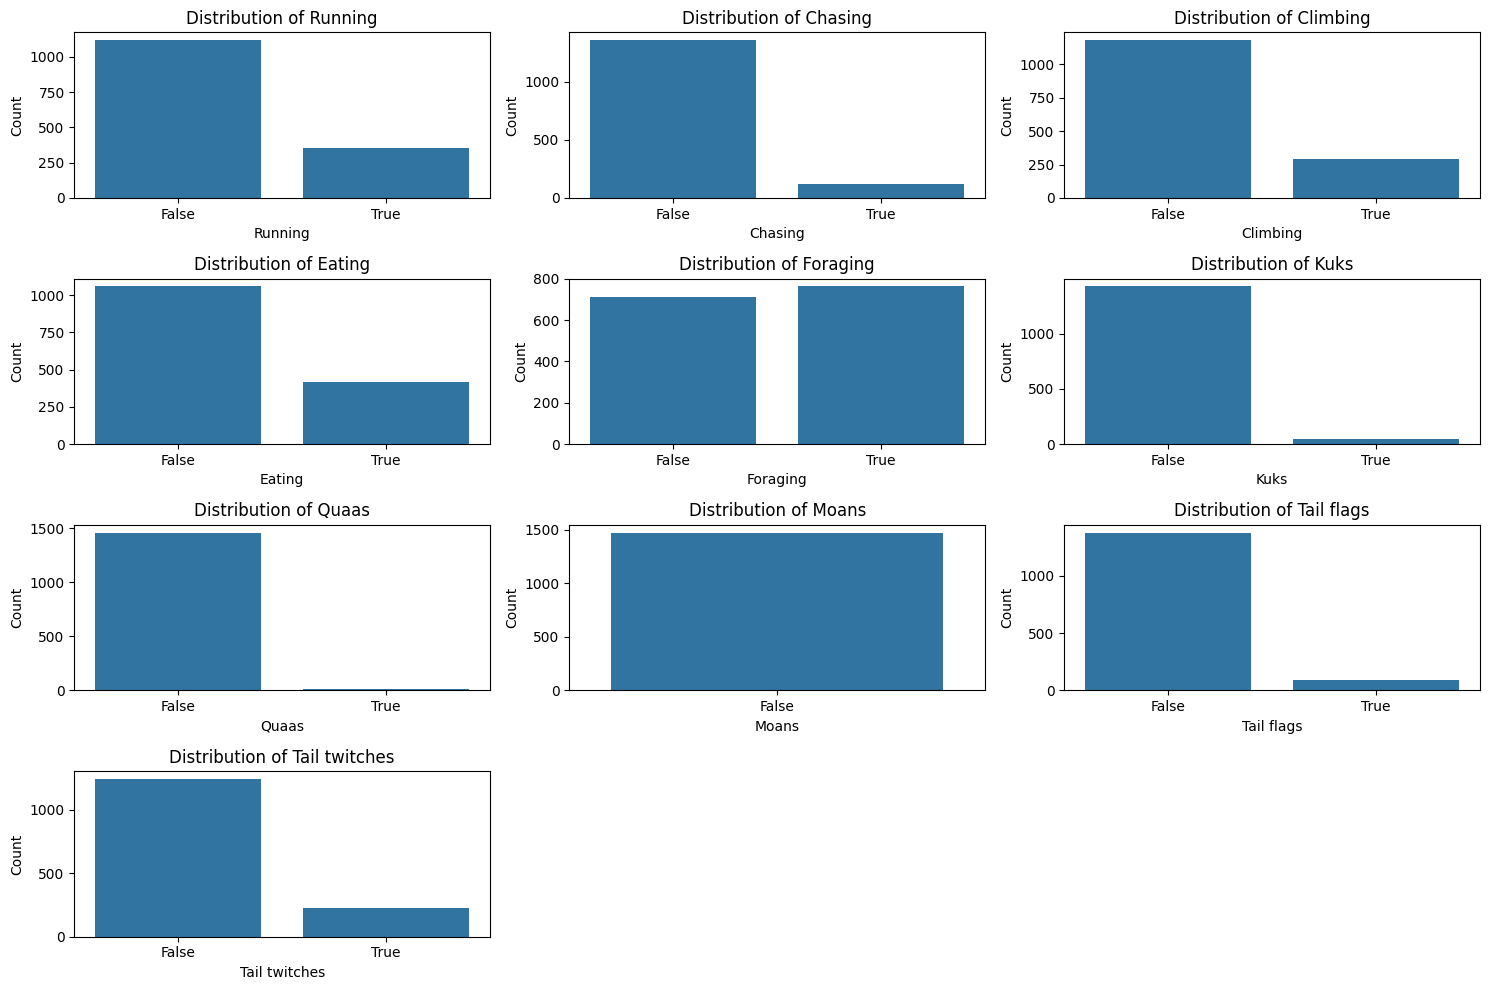

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select boolean behavioral columns from X_train
behavioral_cols_xtrain = ['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging',
                          'Kuks', 'Quaas', 'Moans', 'Tail flags', 'Tail twitches']

# Create count plots for each behavioral column in X_train
plt.figure(figsize=(15, 10))
for i, col in enumerate(behavioral_cols_xtrain):
    plt.subplot(4, 3, i + 1)
    sns.countplot(data=X_train, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

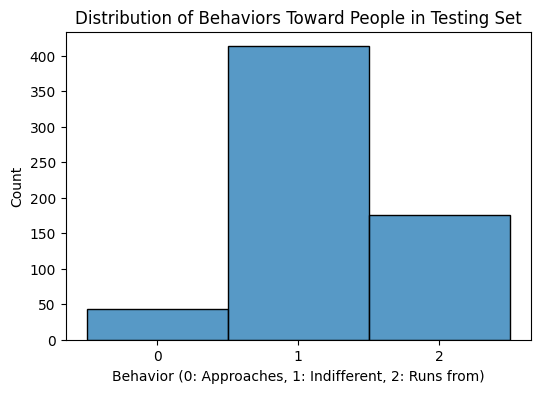

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for the dependent variable (y_test)
plt.figure(figsize=(6, 4))
sns.histplot(y_test, bins=[-0.5, 0.5, 1.5, 2.5], kde=False, discrete=True)
plt.title('Distribution of Behaviors Toward People in Testing Set')
plt.xlabel('Behavior (0: Approaches, 1: Indifferent, 2: Runs from)')
plt.ylabel('Count')
plt.xticks([0, 1, 2])
plt.show()

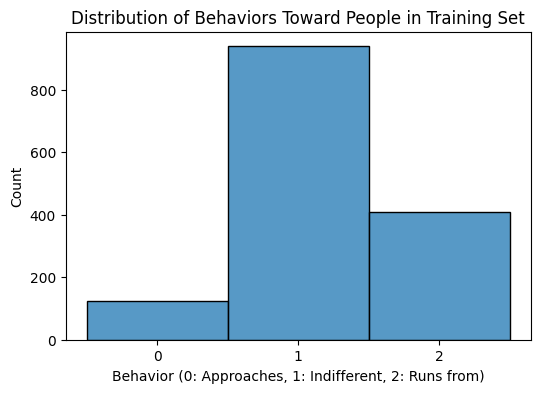

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for the dependent variable (y_train)
plt.figure(figsize=(6, 4))
sns.histplot(y_train, bins=[-0.5, 0.5, 1.5, 2.5], kde=False, discrete=True)
plt.title('Distribution of Behaviors Toward People in Training Set')
plt.xlabel('Behavior (0: Approaches, 1: Indifferent, 2: Runs from)')
plt.ylabel('Count')
plt.xticks([0, 1, 2])
plt.show()

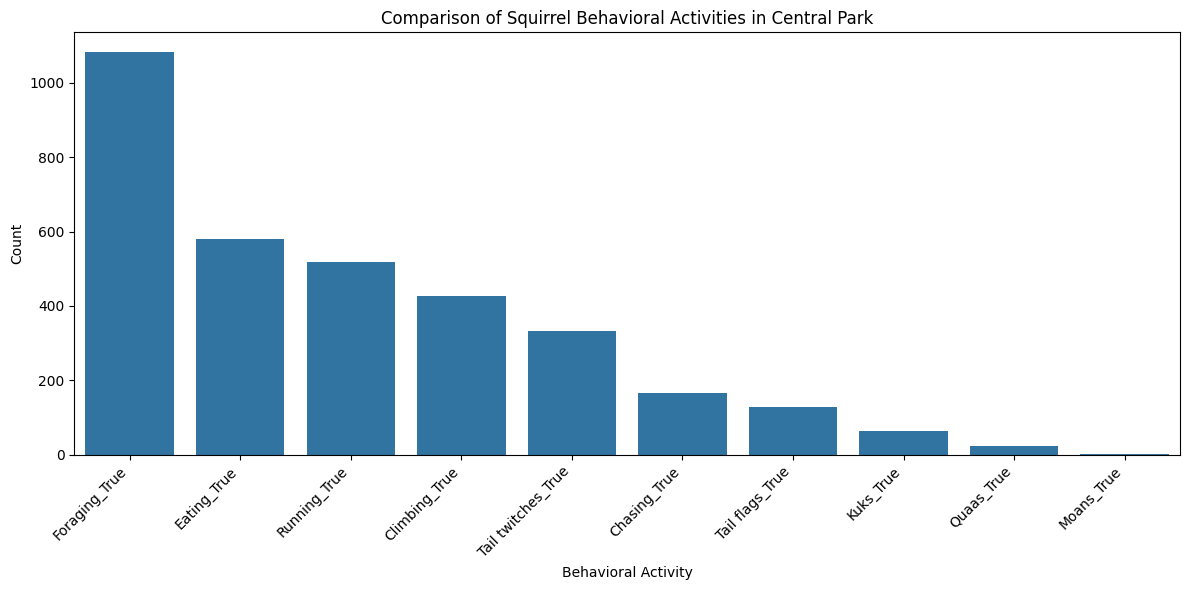

# SURPRISINGLY SQUARRELS IN THE CENTRAL PARK DO NOT APPEAR TO BE STRESSED OUT (VERY SMALL NUMBER OF KUKS, QUAAS, AND MOANS)

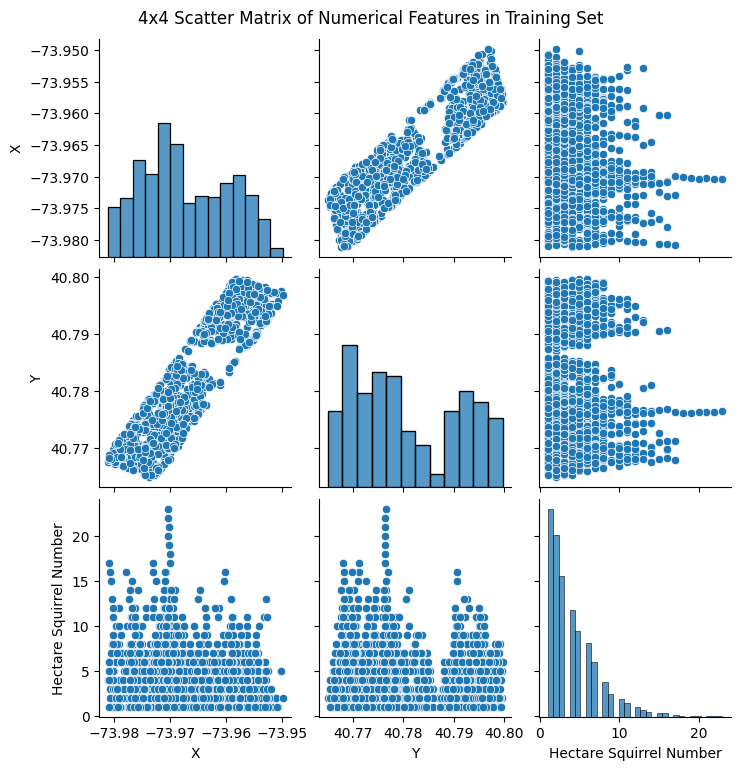

# Because most of the dependent variables are nominal, the scatter matrix does not have much valuable data, unfortunately.